In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [ ]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [ ]:
path = "/content/drive/MyDrive/kddcup.data_10_percent_corrected"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [ ]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

In [ ]:
attack_counts=df['Attack Type'].value_counts()

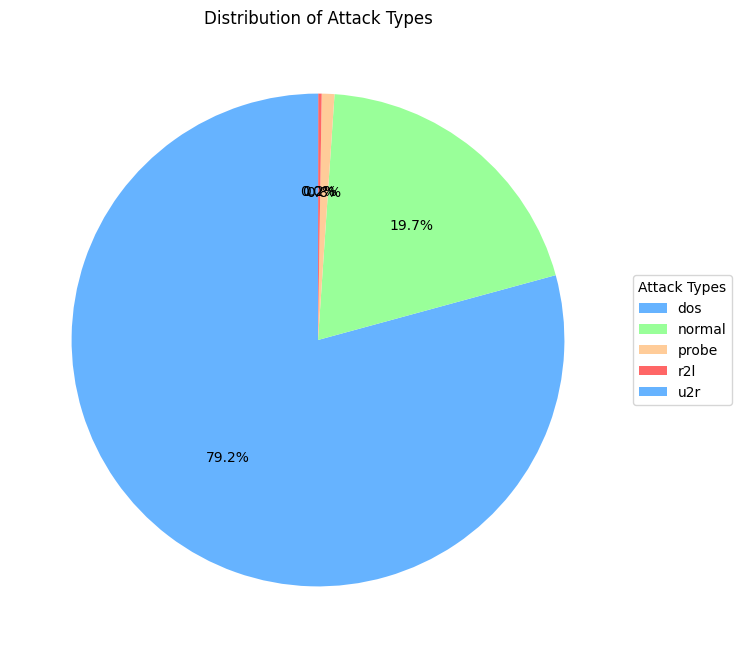

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(attack_counts, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99','#ff6666'])

plt.legend(attack_counts.index, title='Attack Types', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Distribution of Attack Types')
plt.show()

In [ ]:
columns = [col.strip() for col in cols.split(',')]

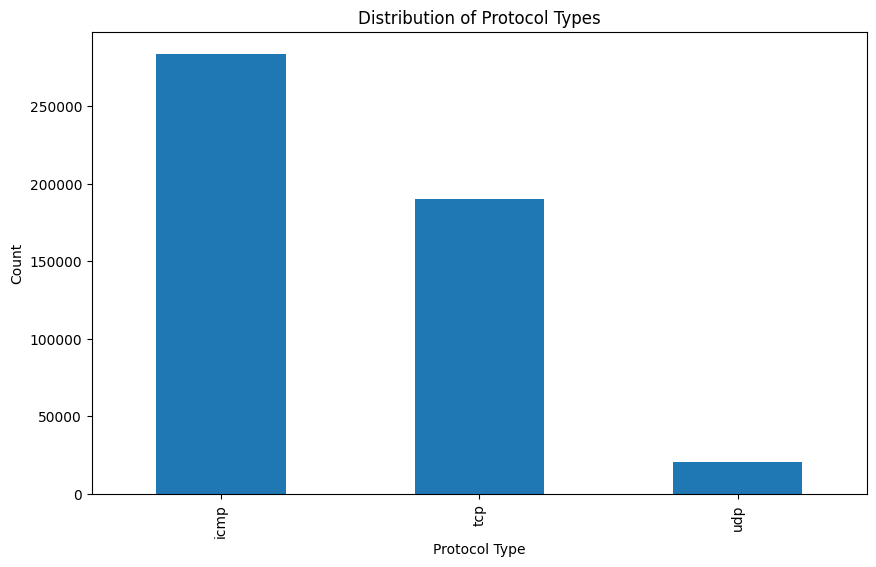

In [ ]:
plt.figure(figsize=(10, 6))
df['protocol_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Protocol Types')
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.show()

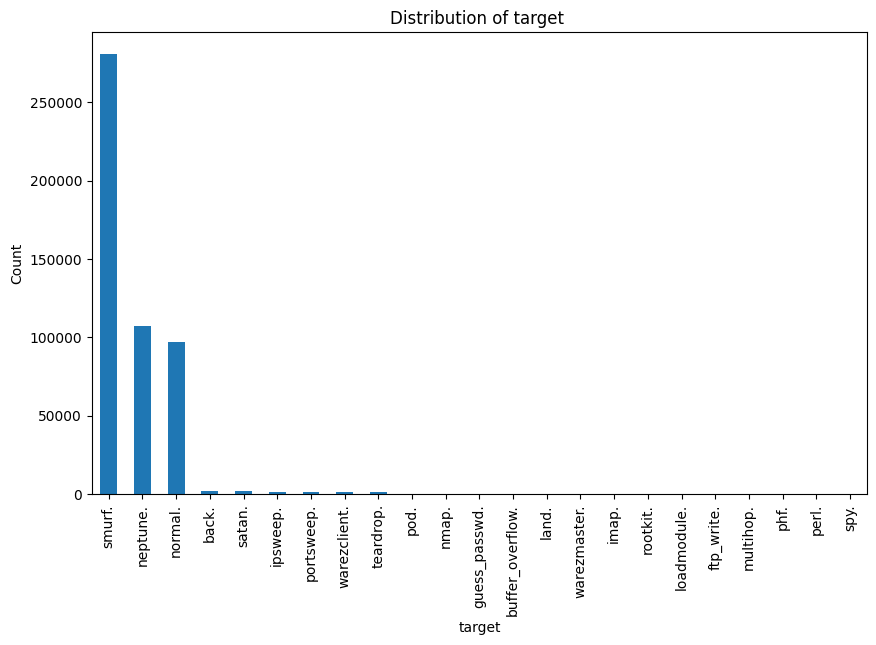

In [ ]:
plt.figure(figsize=(10, 6))
df['target'].value_counts().plot(kind='bar')
plt.title('Distribution of target ')
plt.xlabel('target')
plt.ylabel('Count')
plt.show()

In [ ]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

<ipython-input-13-31c74935275d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')# drop columns with NaN
<ipython-input-13-31c74935275d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


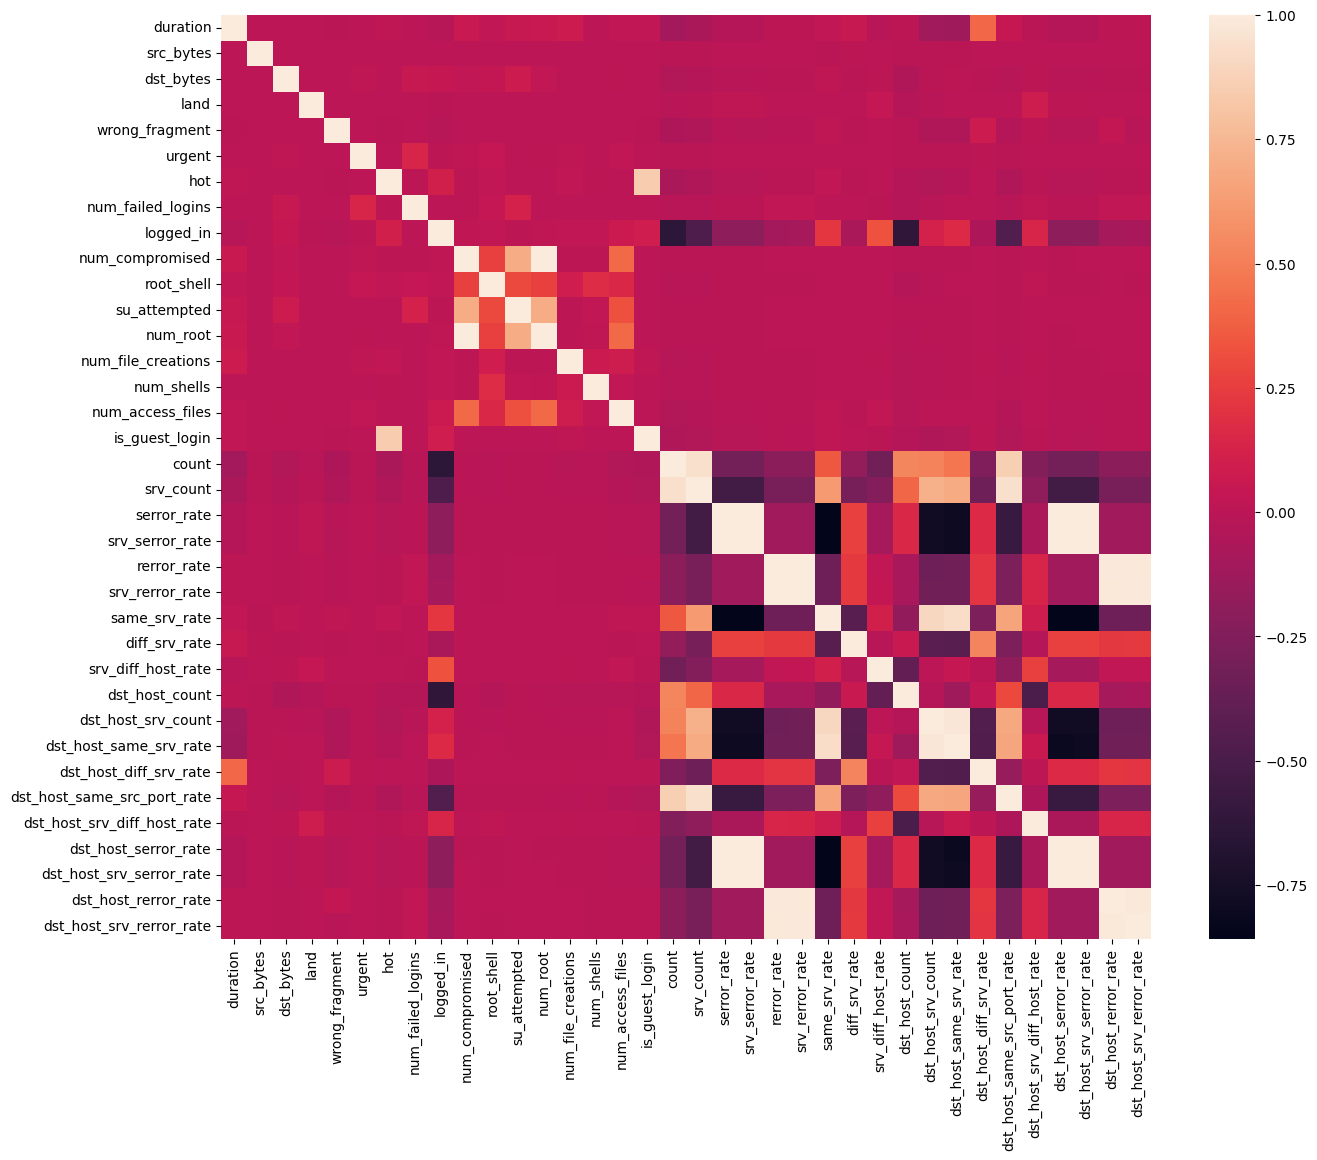

In [ ]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [ ]:
df.drop('num_root',axis = 1,inplace = True)


df.drop('srv_serror_rate',axis = 1,inplace = True)


df.drop('srv_rerror_rate',axis = 1, inplace=True)


df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)


df.drop('dst_host_serror_rate',axis = 1, inplace=True)


df.drop('dst_host_rerror_rate',axis = 1, inplace=True)


df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)


df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)


In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [ ]:
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [ ]:
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [ ]:
amap = {'dos':0,'normal':1,'probe':2,'r2l':3,'u2r':4}
df['Attack Type'] = df['Attack Type'].map(amap)

In [ ]:
df.drop('service',axis = 1,inplace= True)

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Flatten, concatenate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input, Concatenate, Add
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Flatten, concatenate
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = df.drop(['target'], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X= df.drop(['Attack Type',], axis=1)


(494021, 31)


In [ ]:
sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
base_classifier = RandomForestClassifier()

In [ ]:
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=RandomForestClassifier(), random_state=42)

In [ ]:
predictions = bagging_classifier.predict(X_test)


In [ ]:
accuracy = accuracy_score(Y_test, predictions)
report = classification_report(Y_test, predictions)

In [ ]:
print(f"Bagging Accuracy: {accuracy}")
print("Bagging Classification Report:\n", report)

Bagging Accuracy: 0.9996963716411112
Bagging Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     78355
           1       1.00      1.00      1.00     19353
           2       1.00      0.99      0.99       850
           3       0.99      0.95      0.97       235
           4       0.90      0.75      0.82        12

    accuracy                           1.00     98805
   macro avg       0.98      0.94      0.96     98805
weighted avg       1.00      1.00      1.00     98805



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
base_classifiers = [
    ('random_forest', RandomForestClassifier(n_estimators=10, random_state=42)),
    # Add more base classifiers as needed
]

In [ ]:
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression())
stacking_classifier.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


StackingClassifier(estimators=[('random_forest',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42))],
                   final_estimator=LogisticRegression())

In [ ]:
predictions = stacking_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, predictions)
report = classification_report(Y_test, predictions)

In [ ]:
print(f"Stacking Accuracy: {accuracy}")
print("Stacking Classification Report:\n", report)

Stacking Accuracy: 0.9997064925864075
Stacking Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     78355
           1       1.00      1.00      1.00     19353
           2       1.00      0.99      0.99       850
           3       0.98      0.96      0.97       235
           4       0.90      0.75      0.82        12

    accuracy                           1.00     98805
   macro avg       0.97      0.94      0.96     98805
weighted avg       1.00      1.00      1.00     98805



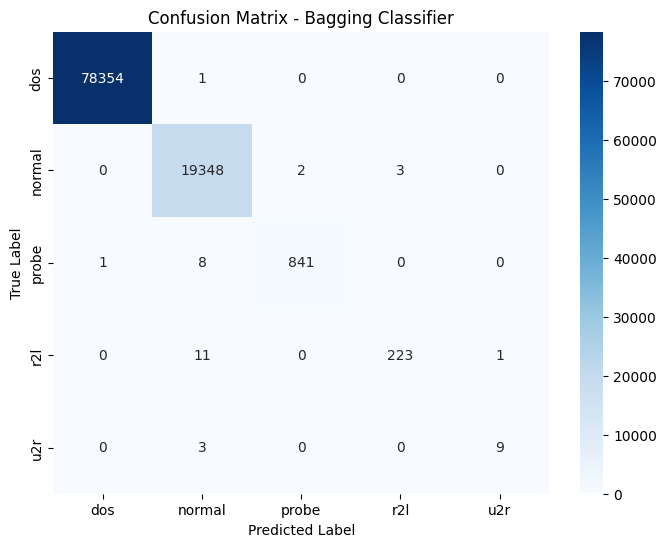

Bagging Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     78355
           1       1.00      1.00      1.00     19353
           2       1.00      0.99      0.99       850
           3       0.99      0.95      0.97       235
           4       0.90      0.75      0.82        12

    accuracy                           1.00     98805
   macro avg       0.98      0.94      0.96     98805
weighted avg       1.00      1.00      1.00     98805



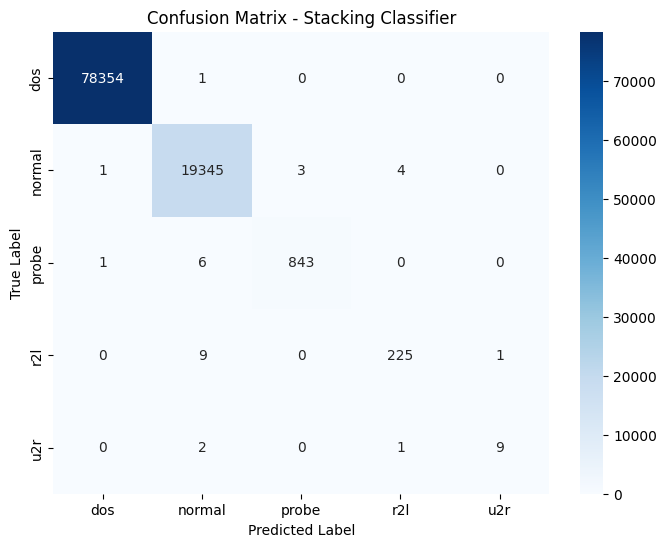

Stacking Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     78355
           1       1.00      1.00      1.00     19353
           2       1.00      0.99      0.99       850
           3       0.98      0.96      0.97       235
           4       0.90      0.75      0.82        12

    accuracy                           1.00     98805
   macro avg       0.97      0.94      0.96     98805
weighted avg       1.00      1.00      1.00     98805



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix and Classification Report for Bagging Classifier
bagging_predictions = bagging_classifier.predict(X_test)
bagging_conf_matrix = confusion_matrix(Y_test, bagging_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(bagging_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=amap.keys(), yticklabels=amap.keys())
plt.title('Confusion Matrix - Bagging Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

bagging_report = classification_report(Y_test, bagging_predictions)
print("Bagging Classification Report:\n", bagging_report)

# Confusion Matrix and Classification Report for Stacking Classifier
stacking_predictions = stacking_classifier.predict(X_test)
stacking_conf_matrix = confusion_matrix(Y_test, stacking_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(stacking_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=amap.keys(), yticklabels=amap.keys())
plt.title('Confusion Matrix - Stacking Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

stacking_report = classification_report(Y_test, stacking_predictions)
print("Stacking Classification Report:\n", stacking_report)


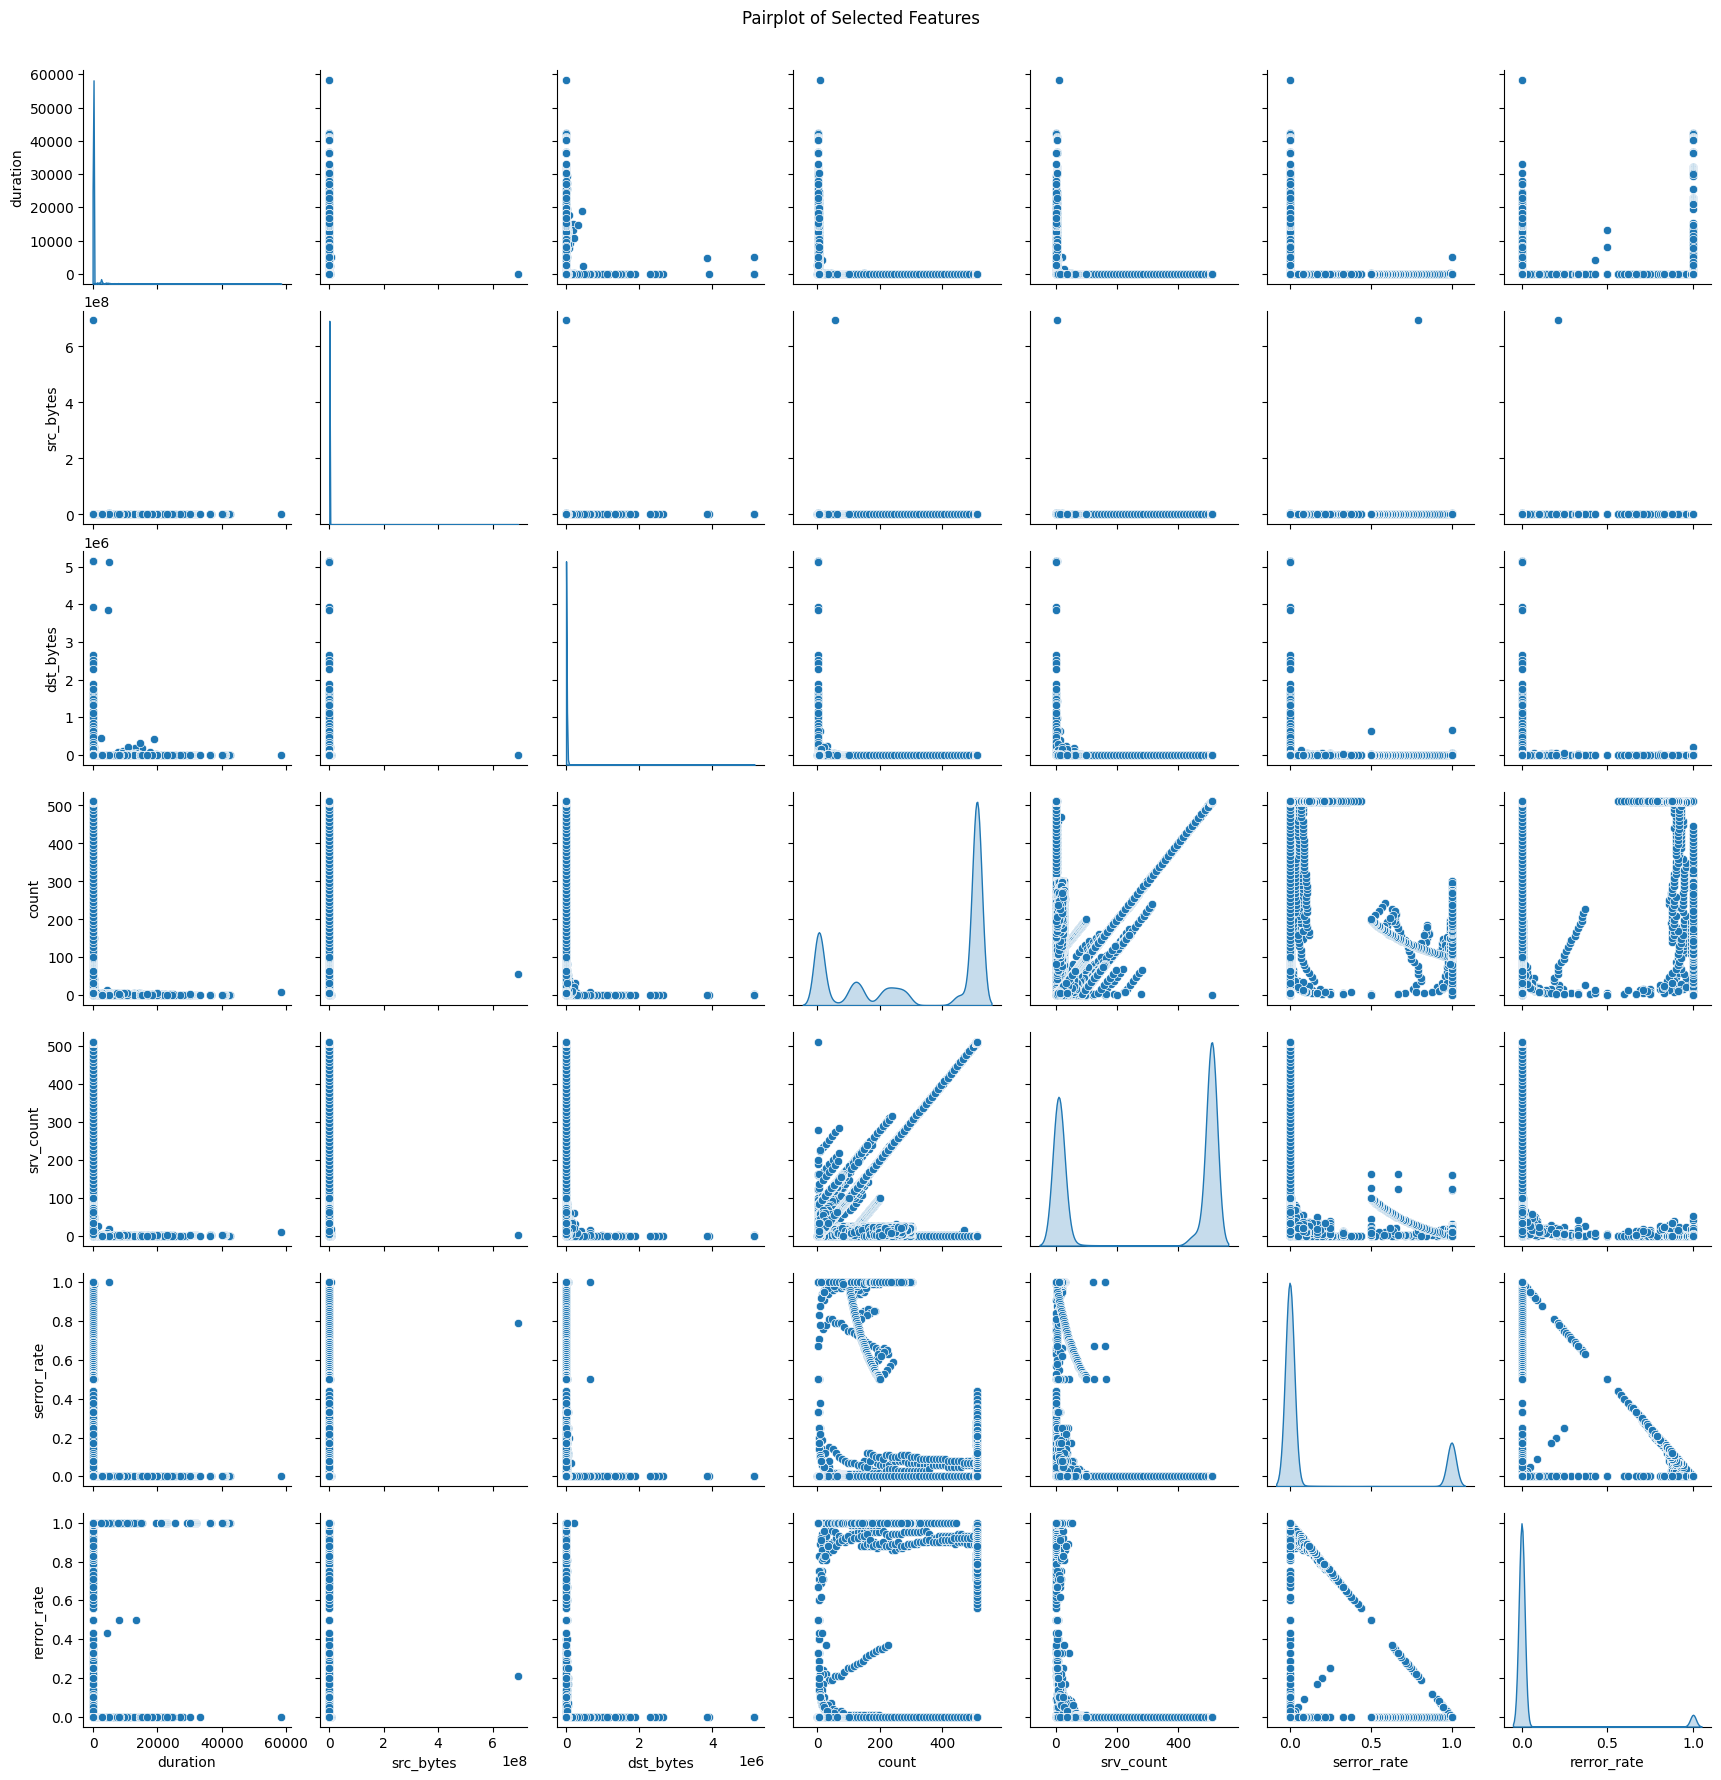

In [ ]:
selected_features = ['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 'serror_rate', 'rerror_rate']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

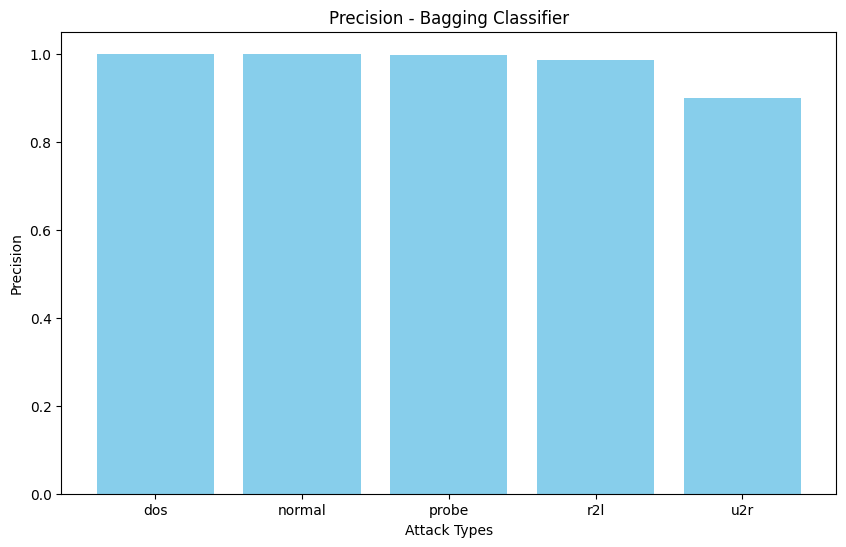

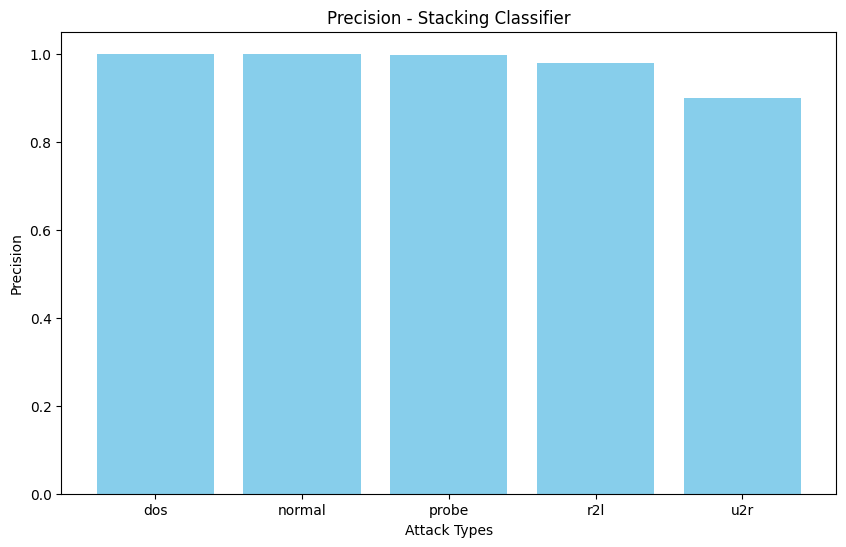

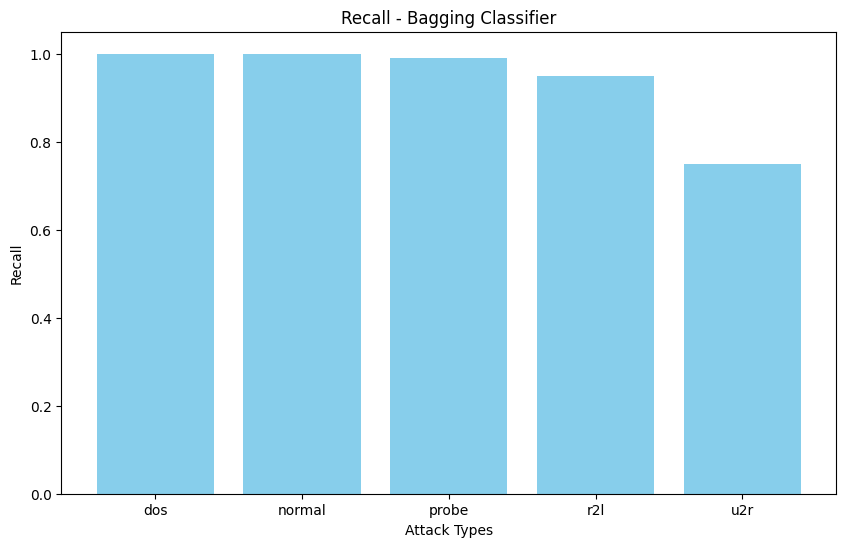

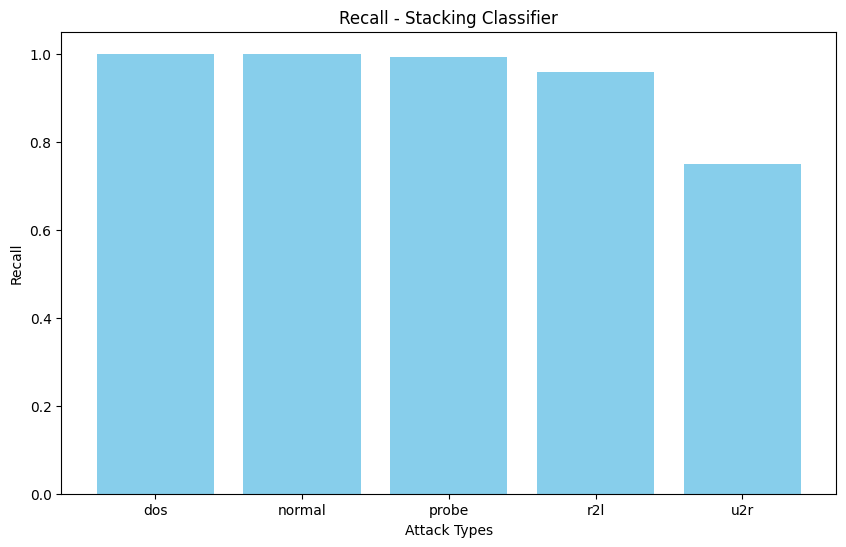

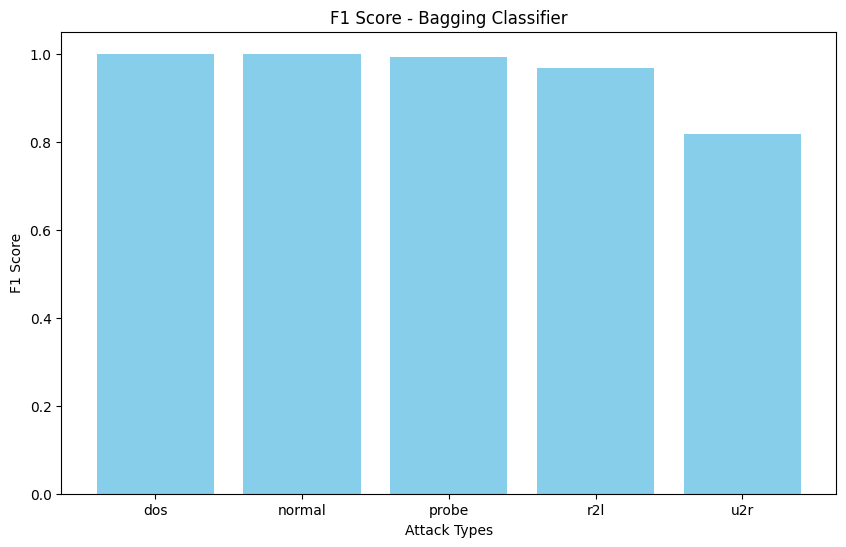

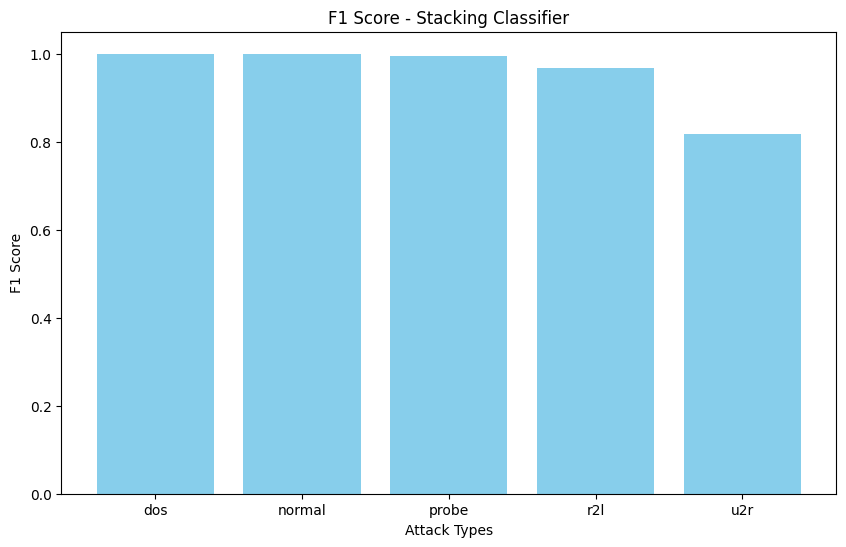

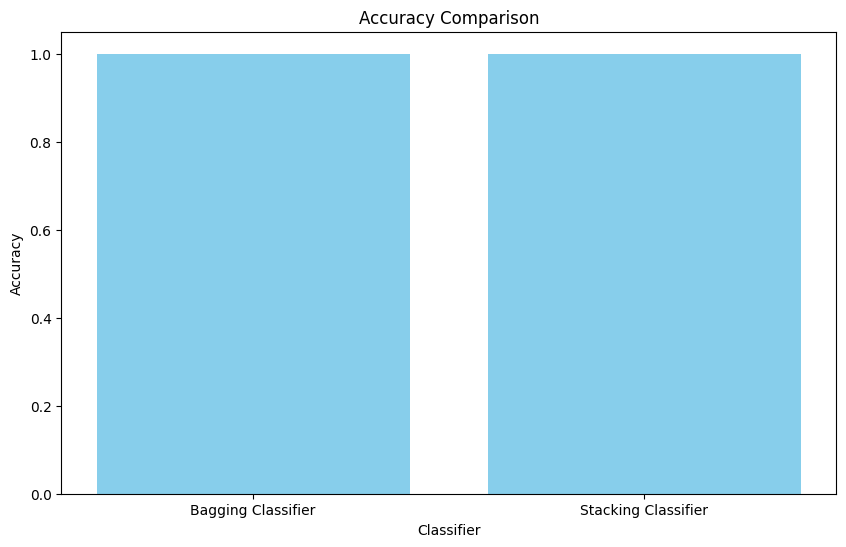

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Function to plot a bar graph
def plot_bar_graph(labels, values, title, ylabel):
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='skyblue')
    plt.title(title)
    plt.xlabel('Attack Types')
    plt.ylabel(ylabel)
    plt.show()

# Metrics for Bagging Classifier
bagging_precision = precision_score(Y_test, bagging_predictions, average=None)
bagging_recall = recall_score(Y_test, bagging_predictions, average=None)
bagging_f1 = f1_score(Y_test, bagging_predictions, average=None)
bagging_accuracy = accuracy_score(Y_test, bagging_predictions)

# Metrics for Stacking Classifier
stacking_precision = precision_score(Y_test, stacking_predictions, average=None)
stacking_recall = recall_score(Y_test, stacking_predictions, average=None)
stacking_f1 = f1_score(Y_test, stacking_predictions, average=None)
stacking_accuracy = accuracy_score(Y_test, stacking_predictions)

labels = list(amap.keys())

# Plot precision
plot_bar_graph(labels, bagging_precision, 'Precision - Bagging Classifier', 'Precision')
plot_bar_graph(labels, stacking_precision, 'Precision - Stacking Classifier', 'Precision')

# Plot recall
plot_bar_graph(labels, bagging_recall, 'Recall - Bagging Classifier', 'Recall')
plot_bar_graph(labels, stacking_recall, 'Recall - Stacking Classifier', 'Recall')

# Plot F1 score
plot_bar_graph(labels, bagging_f1, 'F1 Score - Bagging Classifier', 'F1 Score')
plot_bar_graph(labels, stacking_f1, 'F1 Score - Stacking Classifier', 'F1 Score')

# Plot accuracy
accuracy_values = [bagging_accuracy, stacking_accuracy]
accuracy_labels = ['Bagging Classifier', 'Stacking Classifier']
plt.figure(figsize=(10, 6))
plt.bar(accuracy_labels, accuracy_values, color='skyblue')
plt.title('Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.show()



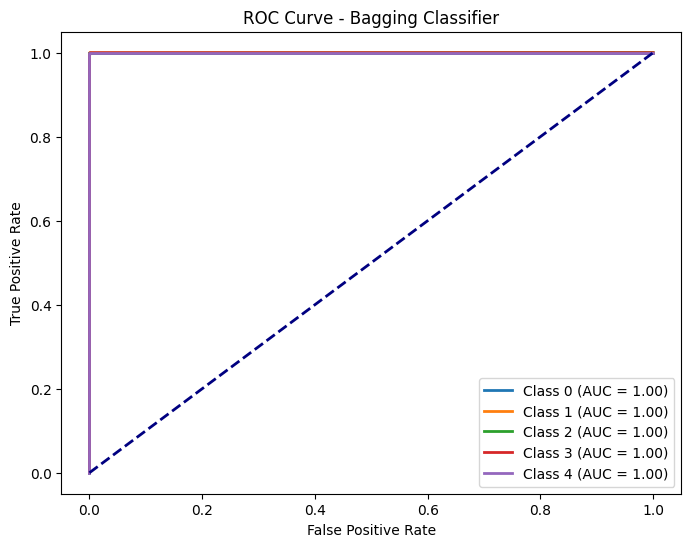

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

# Binarize the labels
y_bin = label_binarize(Y_test, classes=[0, 1, 2, 3, 4])

# Bagging Classifier ROC curve
bagging_probs = bagging_classifier.predict_proba(X_test)
fpr_bagging = dict()
tpr_bagging = dict()
roc_auc_bagging = dict()

for i in range(len(amap)):
    fpr_bagging[i], tpr_bagging[i], _ = roc_curve(y_bin[:, i], bagging_probs[:, i])
    roc_auc_bagging[i] = auc(fpr_bagging[i], tpr_bagging[i])

# Plot ROC curve for Bagging Classifier
plt.figure(figsize=(8, 6))
for i in range(len(amap)):
    plt.plot(fpr_bagging[i], tpr_bagging[i], lw=2, label=f'Class {i} (AUC = {roc_auc_bagging[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Bagging Classifier')
plt.legend(loc='lower right')
plt.show()




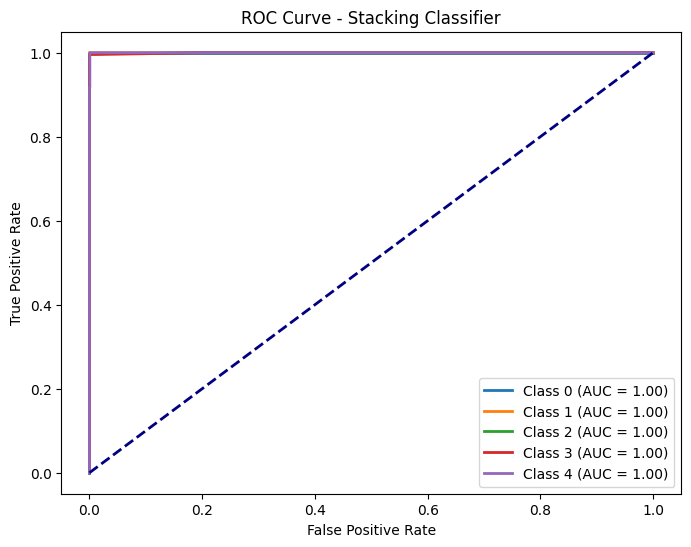

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

# Binarize the labels
y_bin = label_binarize(Y_test, classes=[0, 1, 2, 3, 4])

# Stacking Classifier ROC curve
stacking_probs = stacking_classifier.predict_proba(X_test)
fpr_stacking = dict()
tpr_stacking = dict()
roc_auc_stacking = dict()

for i in range(len(amap)):
    fpr_stacking[i], tpr_stacking[i], _ = roc_curve(y_bin[:, i], stacking_probs[:, i])
    roc_auc_stacking[i] = auc(fpr_stacking[i], tpr_stacking[i])

# Plot ROC curve for Stacking Classifier
plt.figure(figsize=(8, 6))
for i in range(len(amap)):
    plt.plot(fpr_stacking[i], tpr_stacking[i], lw=2, label=f'Class {i} (AUC = {roc_auc_stacking[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Classifier')
plt.legend(loc='lower right')
plt.show()


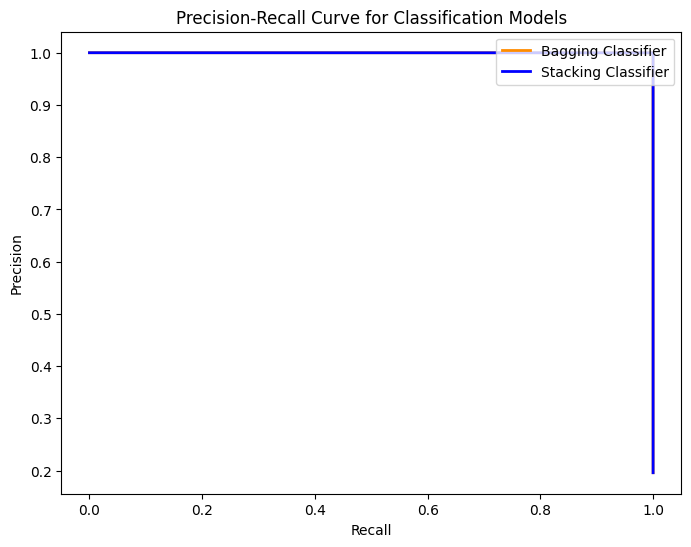

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve

# Binarize the labels
y_bin = label_binarize(Y_test, classes=[0, 1, 2, 3, 4])

# Bagging Classifier
precision_bagging, recall_bagging, _ = precision_recall_curve(y_bin[:, 1], bagging_probs[:, 1])

# Stacking Classifier
precision_stacking, recall_stacking, _ = precision_recall_curve(y_bin[:, 1], stacking_probs[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_bagging, precision_bagging, color='darkorange', lw=2, label='Bagging Classifier')
plt.plot(recall_stacking, precision_stacking, color='blue', lw=2, label='Stacking Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Classification Models')
plt.legend(loc='upper right')
plt.show()



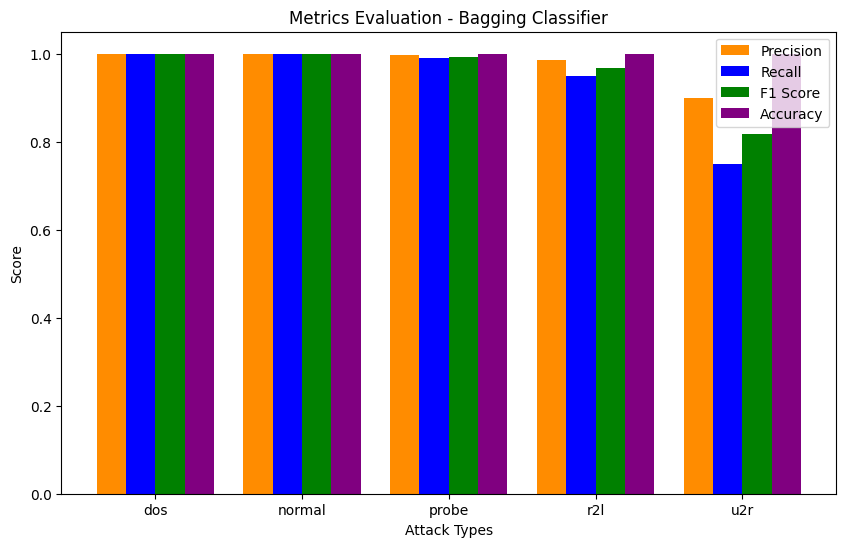

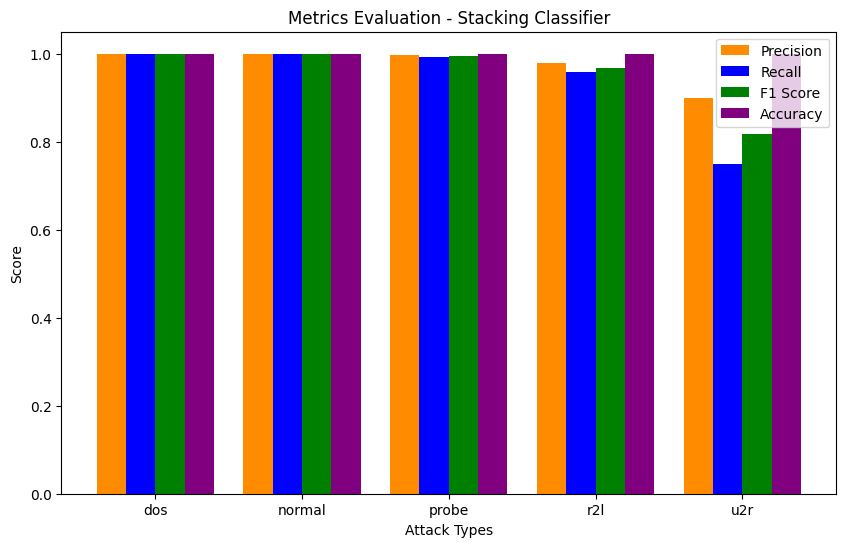

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Function to plot metrics evaluation
def plot_metrics_evaluation(y_true, y_pred, title):
    metrics = precision_recall_fscore_support(y_true, y_pred, average=None, labels=list(amap.values()))
    accuracy = accuracy_score(y_true, y_pred)

    classes = list(amap.keys())

    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.2
    index = np.arange(len(classes))

    # Plot precision
    ax.bar(index, metrics[0], bar_width, label='Precision', color='darkorange')

    # Plot recall
    ax.bar(index + bar_width, metrics[1], bar_width, label='Recall', color='blue')

    # Plot F1 score
    ax.bar(index + 2 * bar_width, metrics[2], bar_width, label='F1 Score', color='green')

    # Plot accuracy
    ax.bar(index + 3 * bar_width, [accuracy] * len(classes), bar_width, label='Accuracy', color='purple')

    ax.set_xlabel('Attack Types')
    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.set_xticks(index + 1.5 * bar_width)
    ax.set_xticklabels(classes)
    ax.legend()

    plt.show()

# Plot metrics evaluation for Bagging Classifier
plot_metrics_evaluation(Y_test, bagging_predictions, "Metrics Evaluation - Bagging Classifier")

# Plot metrics evaluation for Stacking Classifier
plot_metrics_evaluation(Y_test, stacking_predictions, "Metrics Evaluation - Stacking Classifier")
